## Plot ECCO row transects

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# theta_dir = 'H:/PhD_chap3/data/ECCO_melville/rows_netcdfs/THETA/'
# salt_dir  = 'H:/PhD_chap3/data/ECCO_melville/rows_netcdfs/SALT/'

In [ ]:
theta_dir = '/Users/mariezahn/data/ECCO_WGreenland/rows_netcdfs_teos10/THETA/'
salt_dir  = '/Users/mariezahn/data/ECCO_WGreenland/rows_netcdfs_teos10/SALT/'

Open theta datasets

In [4]:
theta_row000 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row000.nc')
theta_row025 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row025.nc')
theta_row050 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row050.nc')
theta_row075 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row075.nc')
theta_row100 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row100.nc')
theta_row125 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row125.nc')
theta_row150 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row150.nc')

Open salinity datasets

In [5]:
salt_row000 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row000.nc')
salt_row025 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row025.nc')
salt_row050 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row050.nc')
salt_row075 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row075.nc')
salt_row100 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row100.nc')
salt_row125 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row125.nc')
salt_row150 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row150.nc')

Take the annual mean for each row and mask data that is outside of model solution (i.e., land)

In [6]:
## use salinity datasets to create a mask for the other datasets
salt_row000_1Y = salt_row000.resample(time='1Y').mean(dim='time')
salt_row025_1Y = salt_row025.resample(time='1Y').mean(dim='time')
salt_row050_1Y = salt_row050.resample(time='1Y').mean(dim='time')
salt_row075_1Y = salt_row075.resample(time='1Y').mean(dim='time')
salt_row100_1Y = salt_row100.resample(time='1Y').mean(dim='time')
salt_row125_1Y = salt_row125.resample(time='1Y').mean(dim='time')
salt_row150_1Y = salt_row150.resample(time='1Y').mean(dim='time')

In [7]:
theta_row000_1Y = theta_row000.resample(time='1Y').mean(dim='time').where(salt_row000_1Y.SALT>0)
theta_row025_1Y = theta_row025.resample(time='1Y').mean(dim='time').where(salt_row025_1Y.SALT>0)
theta_row050_1Y = theta_row050.resample(time='1Y').mean(dim='time').where(salt_row050_1Y.SALT>0)
theta_row075_1Y = theta_row075.resample(time='1Y').mean(dim='time').where(salt_row075_1Y.SALT>0)
theta_row100_1Y = theta_row100.resample(time='1Y').mean(dim='time').where(salt_row100_1Y.SALT>0)
theta_row125_1Y = theta_row125.resample(time='1Y').mean(dim='time').where(salt_row125_1Y.SALT>0)
theta_row150_1Y = theta_row150.resample(time='1Y').mean(dim='time').where(salt_row150_1Y.SALT>0)

In [8]:
salt_row000_1Y = salt_row000_1Y.where(salt_row000_1Y.SALT>0)
salt_row025_1Y = salt_row025_1Y.where(salt_row025_1Y.SALT>0)
salt_row050_1Y = salt_row050_1Y.where(salt_row050_1Y.SALT>0)
salt_row075_1Y = salt_row075_1Y.where(salt_row075_1Y.SALT>0)
salt_row100_1Y = salt_row100_1Y.where(salt_row100_1Y.SALT>0)
salt_row125_1Y = salt_row125_1Y.where(salt_row125_1Y.SALT>0)
salt_row150_1Y = salt_row150_1Y.where(salt_row150_1Y.SALT>0)

### Plot annual means

#### Theta

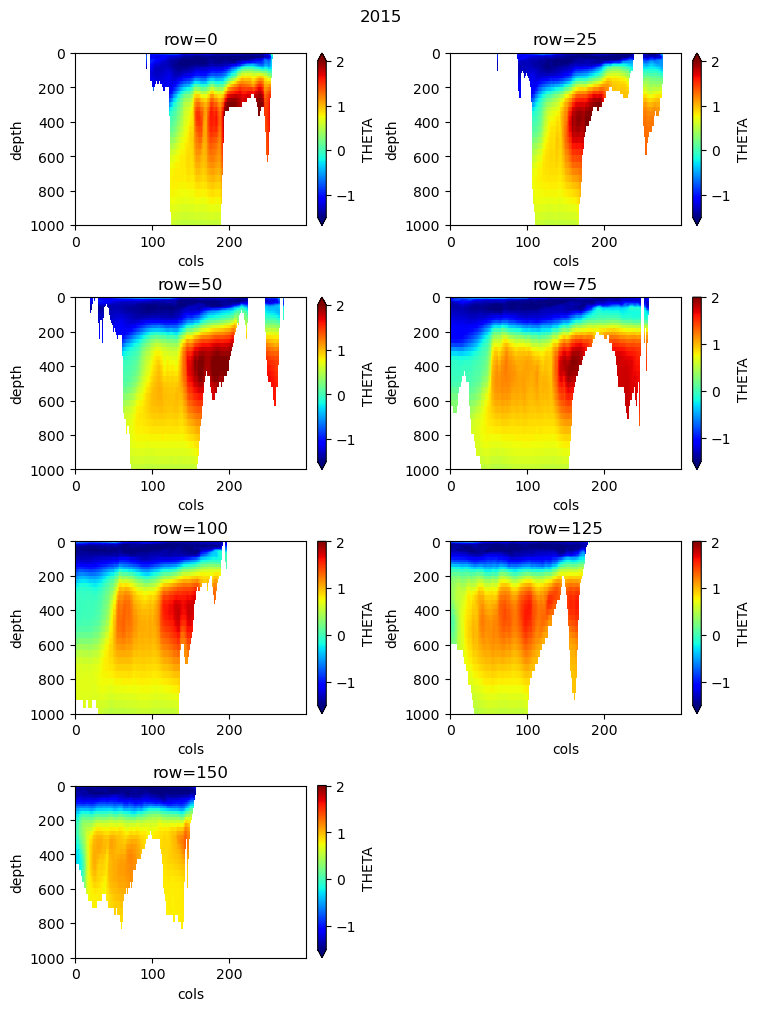

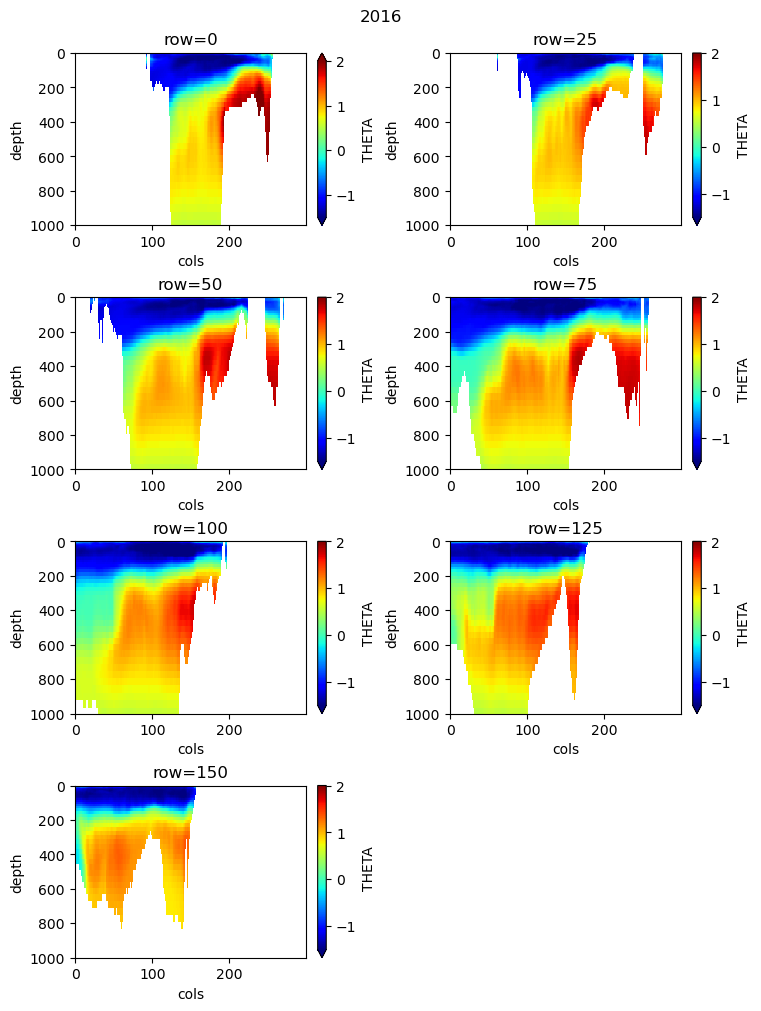

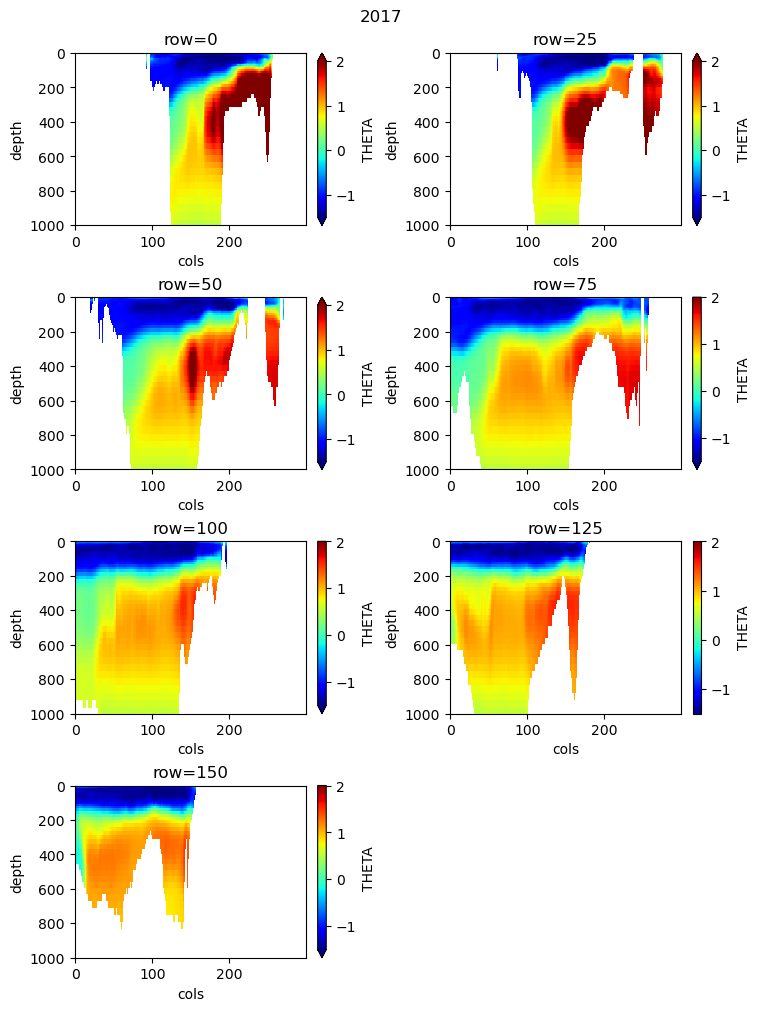

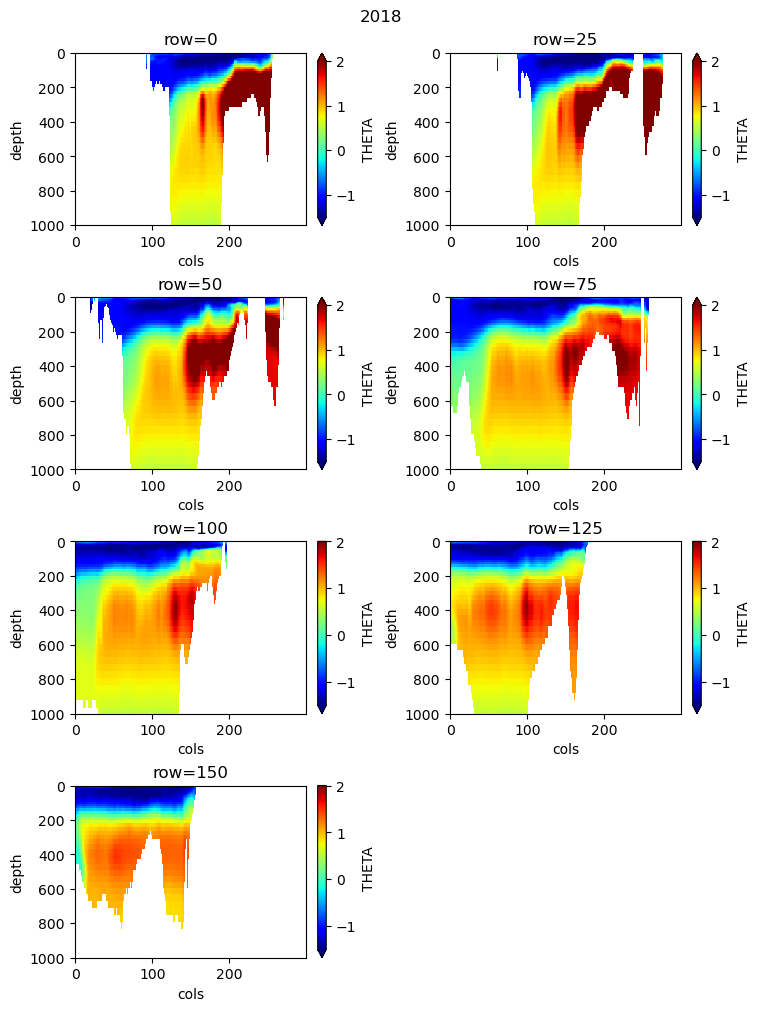

In [12]:
plt.rcParams['figure.figsize'] = [7.5, 10]
plt.rcParams['font.size'] = '10'

for i in range(4):
    fig, axs = plt.subplots(4,2,constrained_layout=True)
    ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8 = axs.ravel()
    
    theta_row000_1Y.isel(time=i).THETA.plot(ax=ax1,vmin=-1.5,vmax=2,cmap='jet')
    theta_row025_1Y.isel(time=i).THETA.plot(ax=ax2,vmin=-1.5,vmax=2,cmap='jet')
    theta_row050_1Y.isel(time=i).THETA.plot(ax=ax3,vmin=-1.5,vmax=2,cmap='jet')
    theta_row075_1Y.isel(time=i).THETA.plot(ax=ax4,vmin=-1.5,vmax=2,cmap='jet')
    theta_row100_1Y.isel(time=i).THETA.plot(ax=ax5,vmin=-1.5,vmax=2,cmap='jet')
    theta_row125_1Y.isel(time=i).THETA.plot(ax=ax6,vmin=-1.5,vmax=2,cmap='jet')
    theta_row150_1Y.isel(time=i).THETA.plot(ax=ax7,vmin=-1.5,vmax=2,cmap='jet')
    
    ax8.axis('off')
    
    labels=["row=0","row=25","row=50","row=75","row=100","row=125","row=150"]
    
    for ax,label in zip((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8),labels):
        ax.set_ylim(1000,0)
        ax.set_title(label)
        
    plt.suptitle(str(theta_row000_1Y.isel(time=i).time.values)[0:4])
    
    plt.show()

#### Salinity

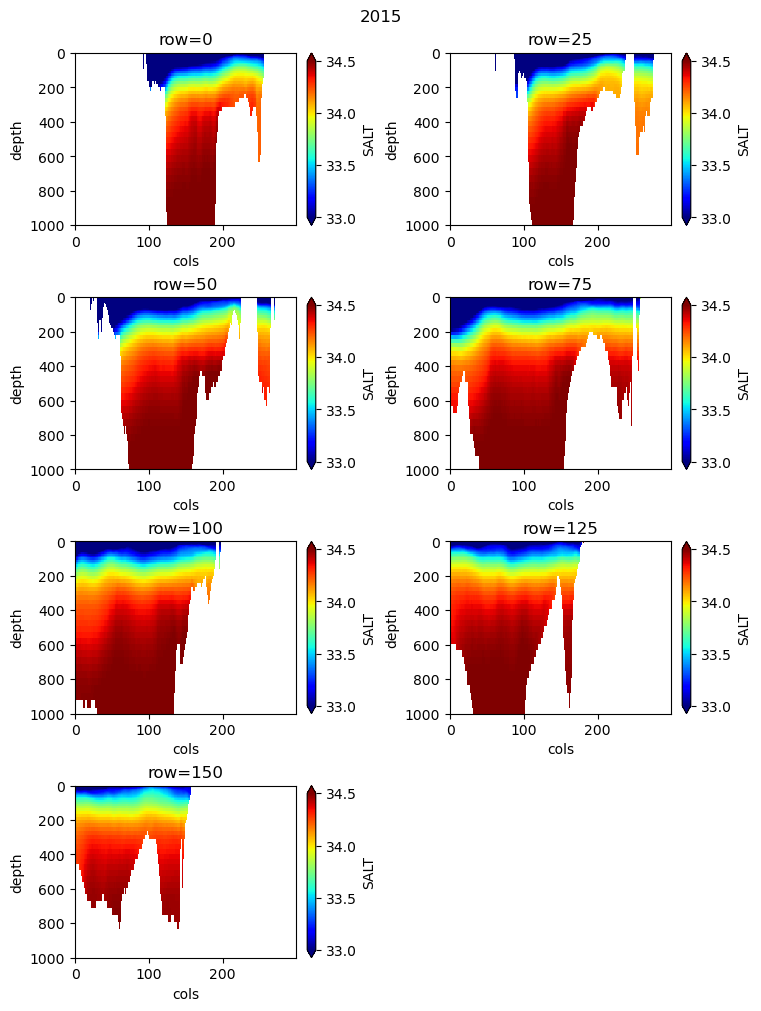

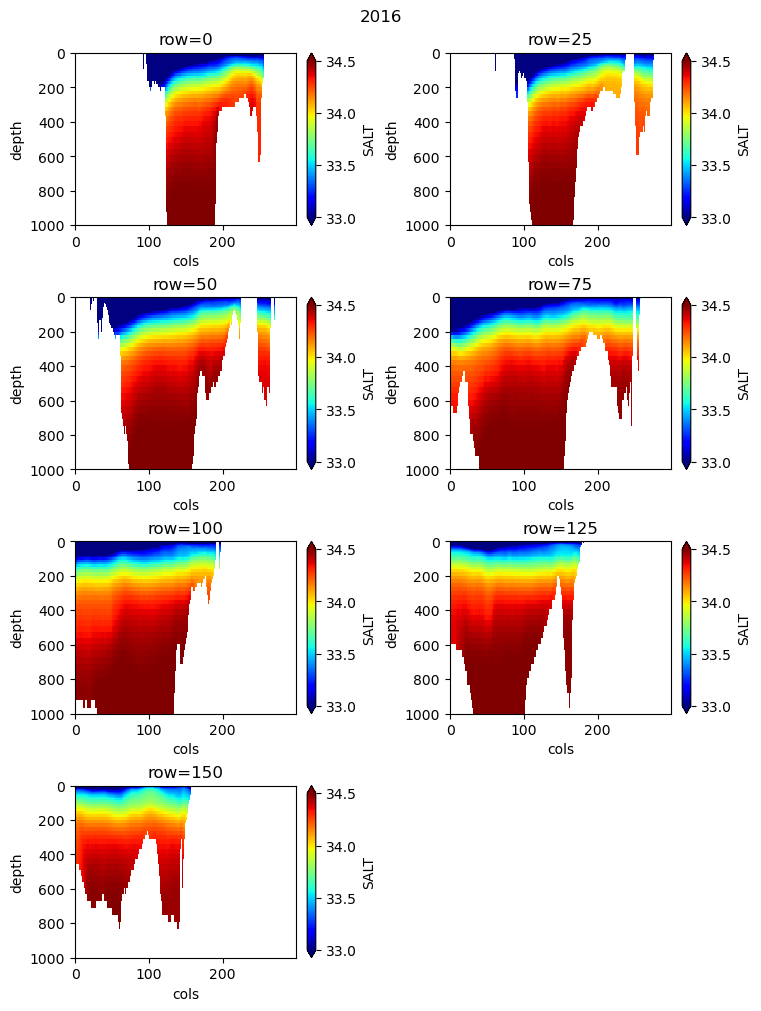

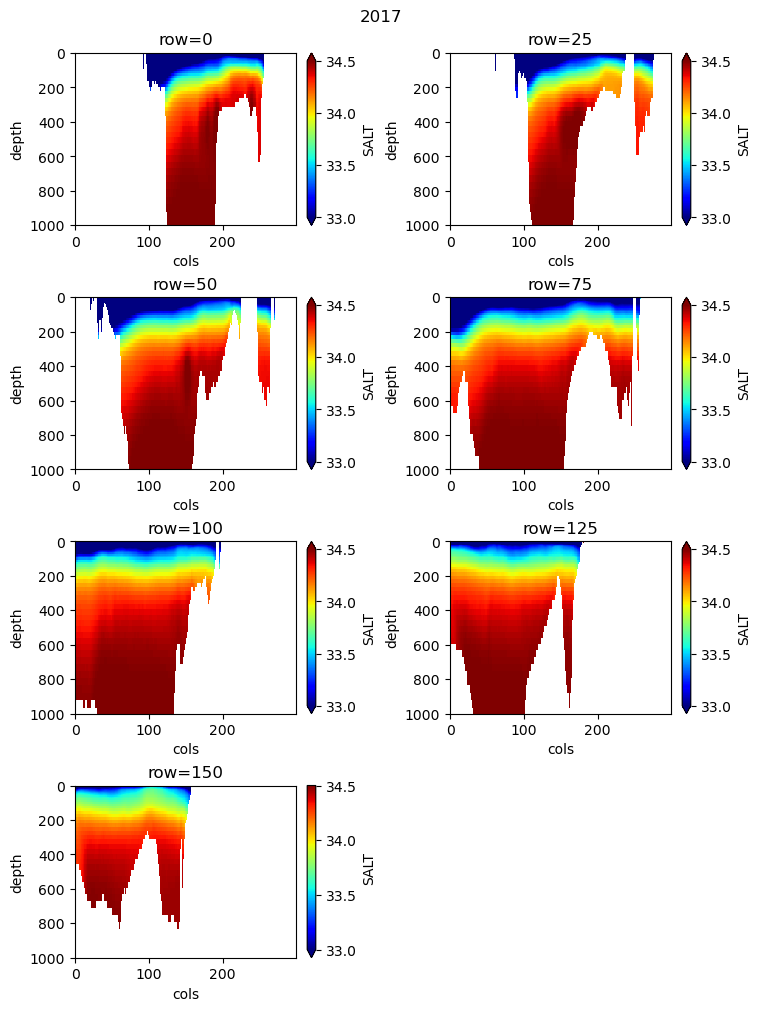

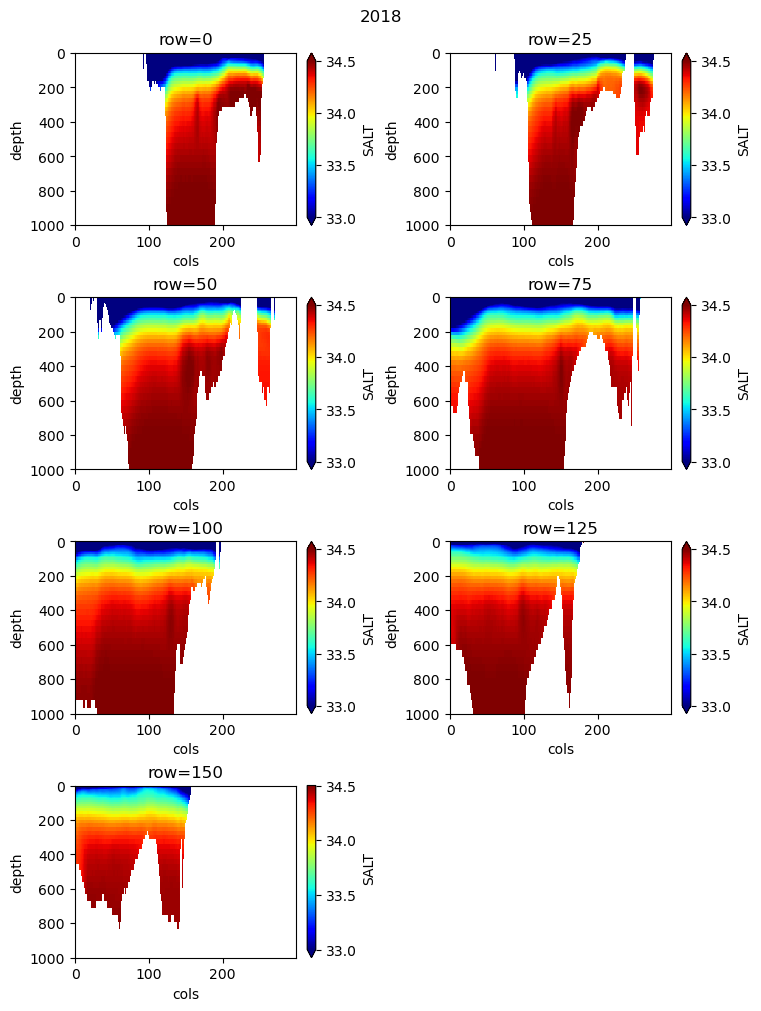

In [13]:
plt.rcParams['figure.figsize'] = [7.5, 10]
plt.rcParams['font.size'] = '10'

for i in range(4):
    fig, axs = plt.subplots(4,2,constrained_layout=True)
    ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8 = axs.ravel()
    
    salt_row000_1Y.isel(time=i).SALT.plot(ax=ax1,vmin=33,vmax=34.5,cmap='jet')
    salt_row025_1Y.isel(time=i).SALT.plot(ax=ax2,vmin=33,vmax=34.5,cmap='jet')
    salt_row050_1Y.isel(time=i).SALT.plot(ax=ax3,vmin=33,vmax=34.5,cmap='jet')
    salt_row075_1Y.isel(time=i).SALT.plot(ax=ax4,vmin=33,vmax=34.5,cmap='jet')
    salt_row100_1Y.isel(time=i).SALT.plot(ax=ax5,vmin=33,vmax=34.5,cmap='jet')
    salt_row125_1Y.isel(time=i).SALT.plot(ax=ax6,vmin=33,vmax=34.5,cmap='jet')
    salt_row150_1Y.isel(time=i).SALT.plot(ax=ax7,vmin=33,vmax=34.5,cmap='jet')
    
    ax8.axis('off')
    
    labels=["row=0","row=25","row=50","row=75","row=100","row=125","row=150"]
    
    for ax,label in zip((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8),labels):
        ax.set_ylim(1000,0)
        ax.set_title(label)
        
    plt.suptitle(str(salt_row000_1Y.isel(time=i).time.values)[0:4])
        
    plt.show()

### Plot annual means - upper 600 m

#### Theta

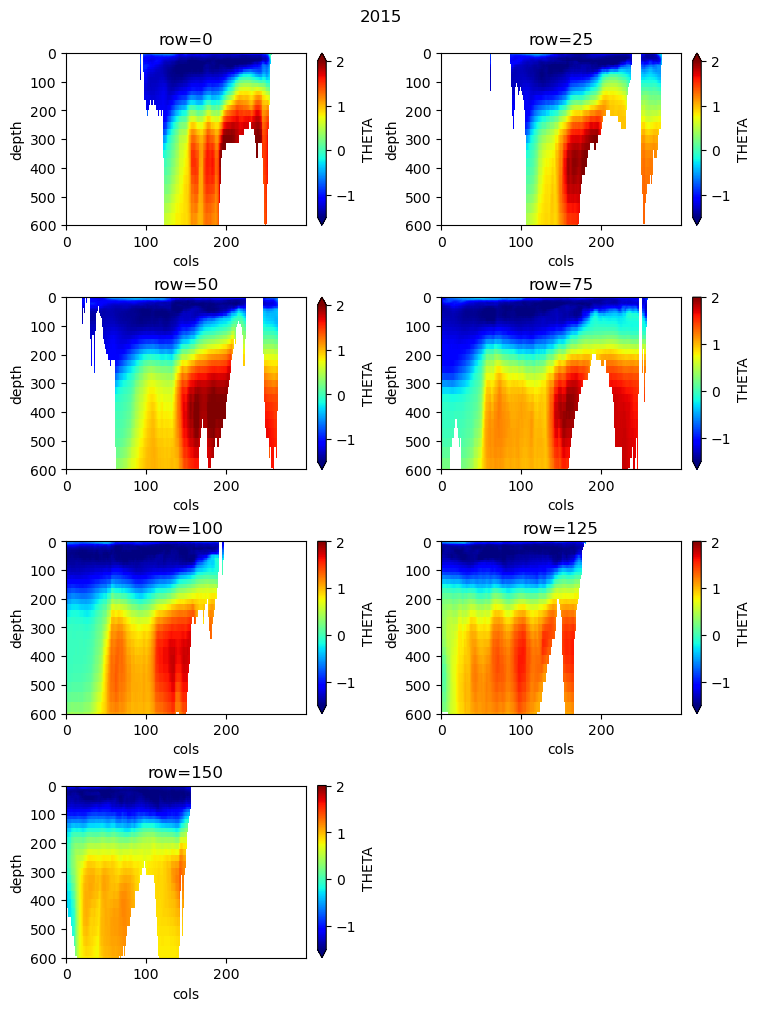

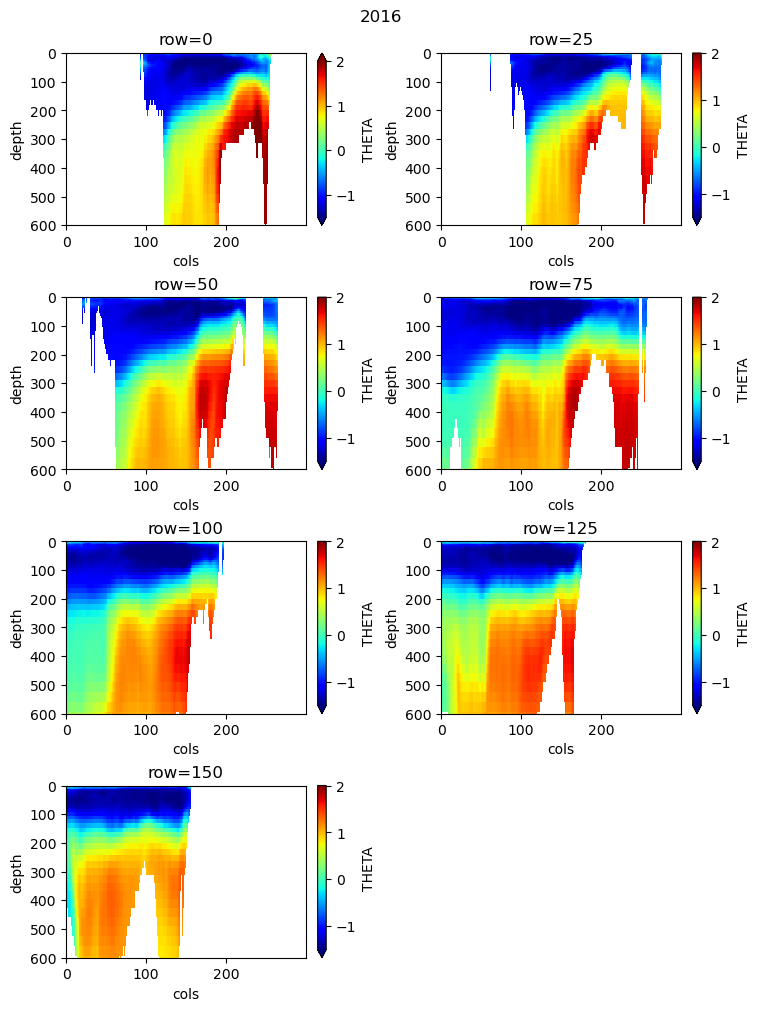

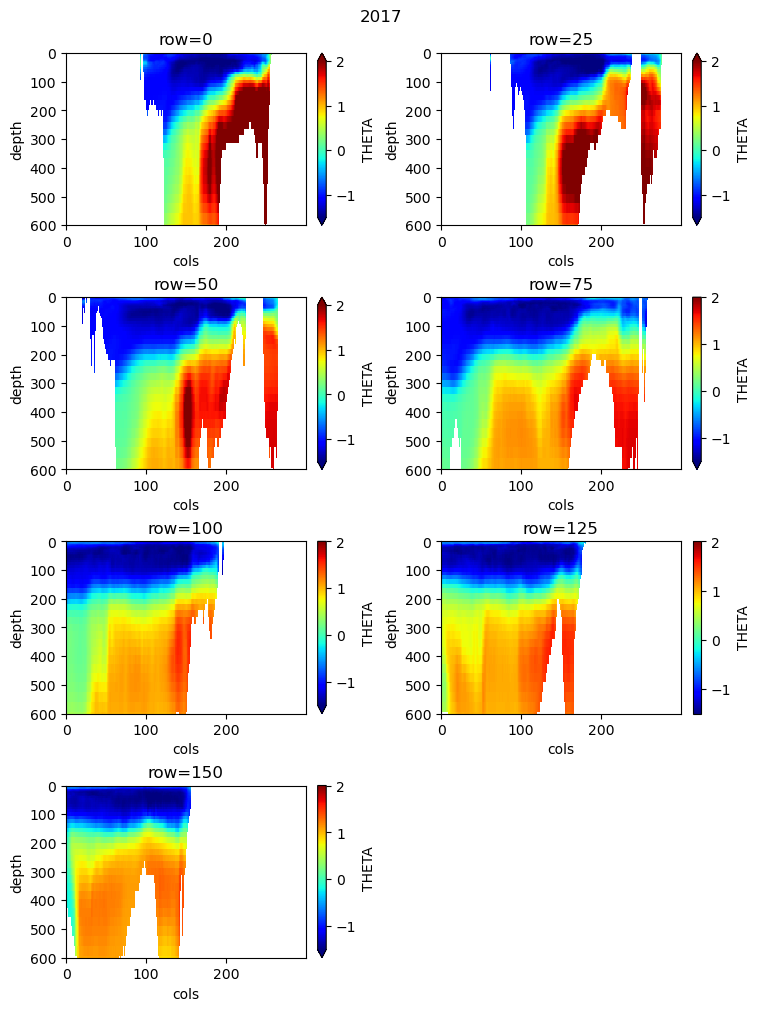

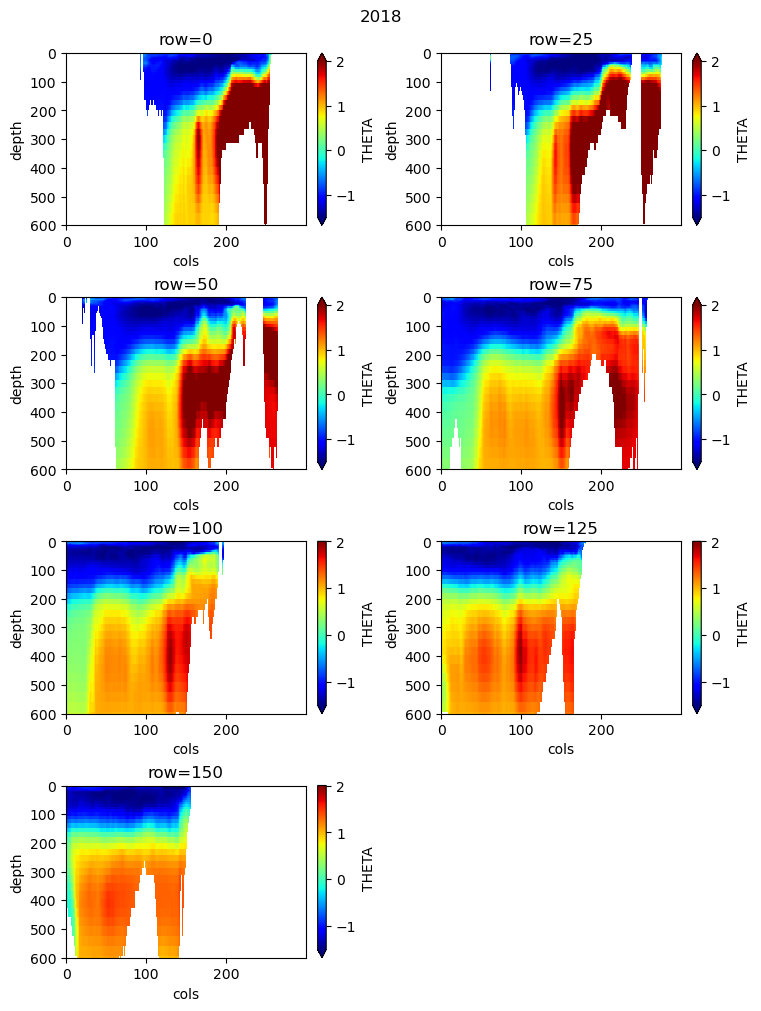

In [14]:
plt.rcParams['figure.figsize'] = [7.5, 10]
plt.rcParams['font.size'] = '10'

for i in range(4):
    fig, axs = plt.subplots(4,2,constrained_layout=True)
    ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8 = axs.ravel()
    
    theta_row000_1Y.isel(time=i).THETA.plot(ax=ax1,vmin=-1.5,vmax=2,cmap='jet')
    theta_row025_1Y.isel(time=i).THETA.plot(ax=ax2,vmin=-1.5,vmax=2,cmap='jet')
    theta_row050_1Y.isel(time=i).THETA.plot(ax=ax3,vmin=-1.5,vmax=2,cmap='jet')
    theta_row075_1Y.isel(time=i).THETA.plot(ax=ax4,vmin=-1.5,vmax=2,cmap='jet')
    theta_row100_1Y.isel(time=i).THETA.plot(ax=ax5,vmin=-1.5,vmax=2,cmap='jet')
    theta_row125_1Y.isel(time=i).THETA.plot(ax=ax6,vmin=-1.5,vmax=2,cmap='jet')
    theta_row150_1Y.isel(time=i).THETA.plot(ax=ax7,vmin=-1.5,vmax=2,cmap='jet')
    
    ax8.axis('off')
    
    labels=["row=0","row=25","row=50","row=75","row=100","row=125","row=150"]
    
    for ax,label in zip((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8),labels):
        ax.set_ylim(600,0)
        ax.set_title(label)
        
    plt.suptitle(str(theta_row000_1Y.isel(time=i).time.values)[0:4])
    
    plt.show()

#### Salinity

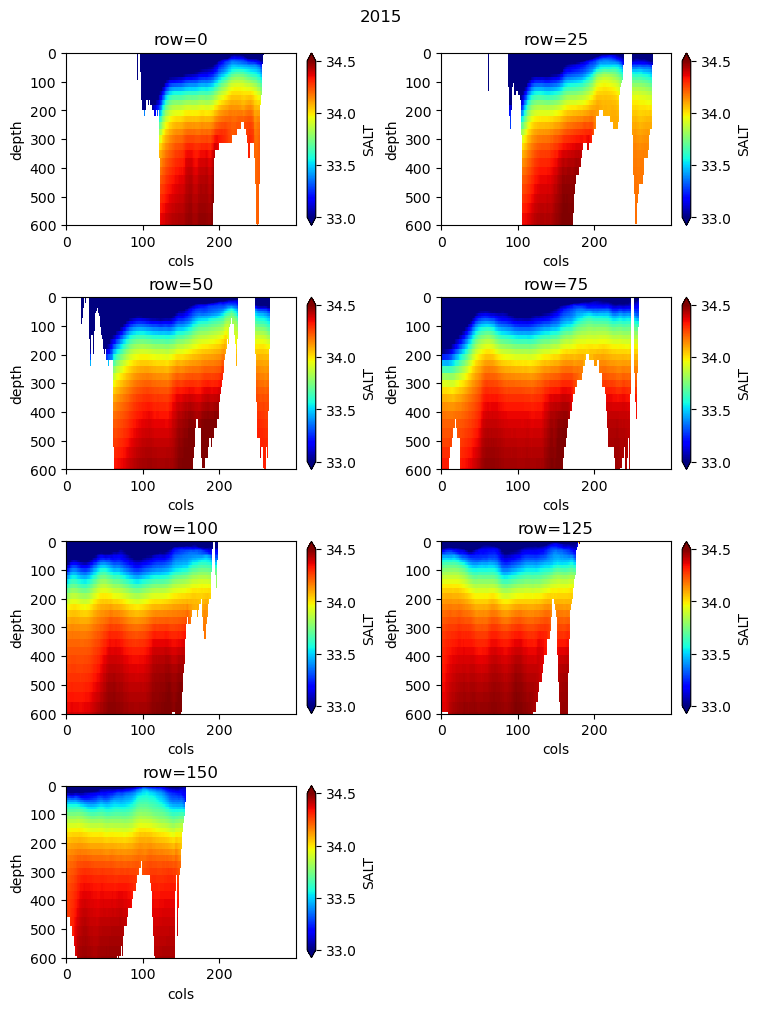

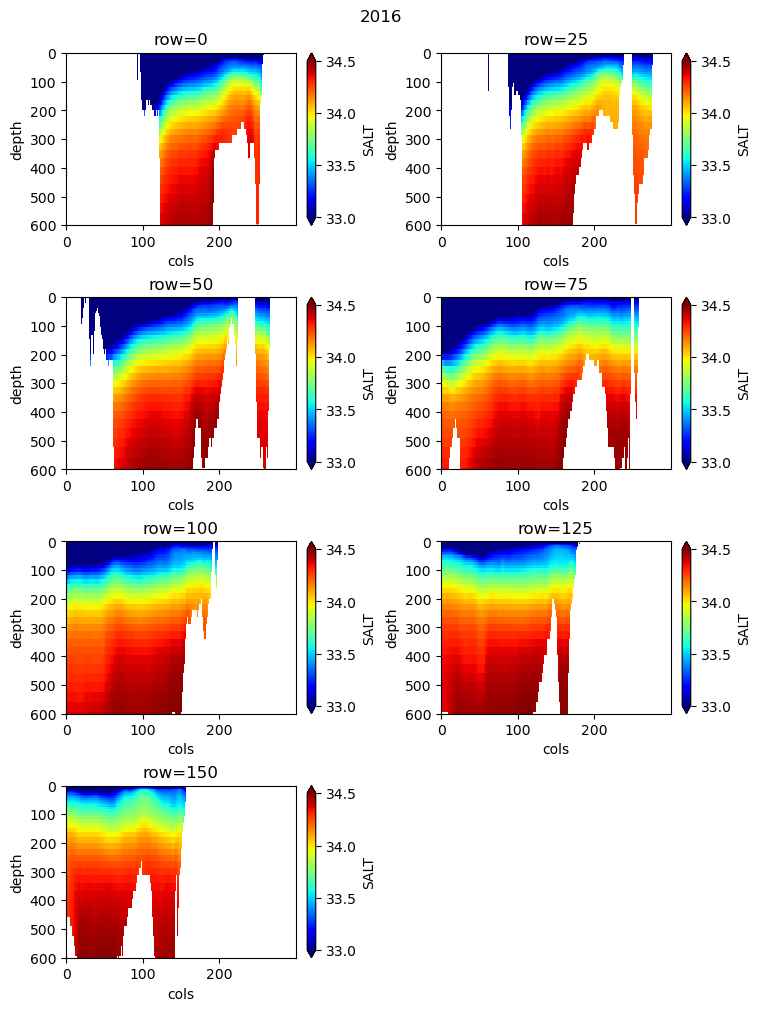

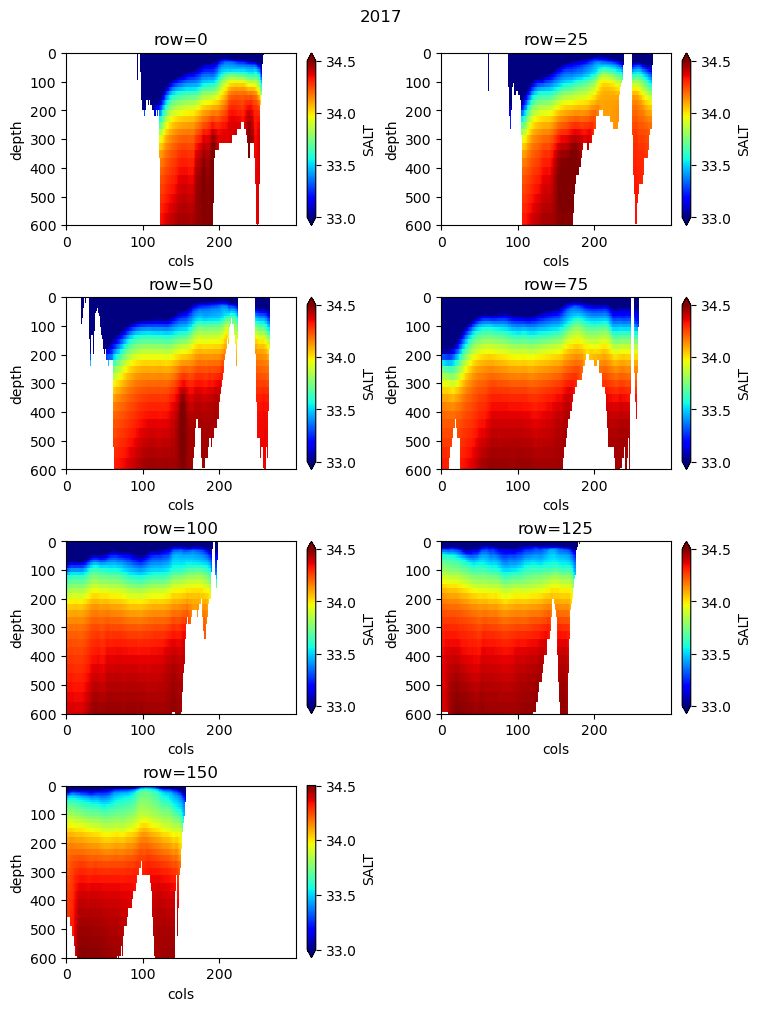

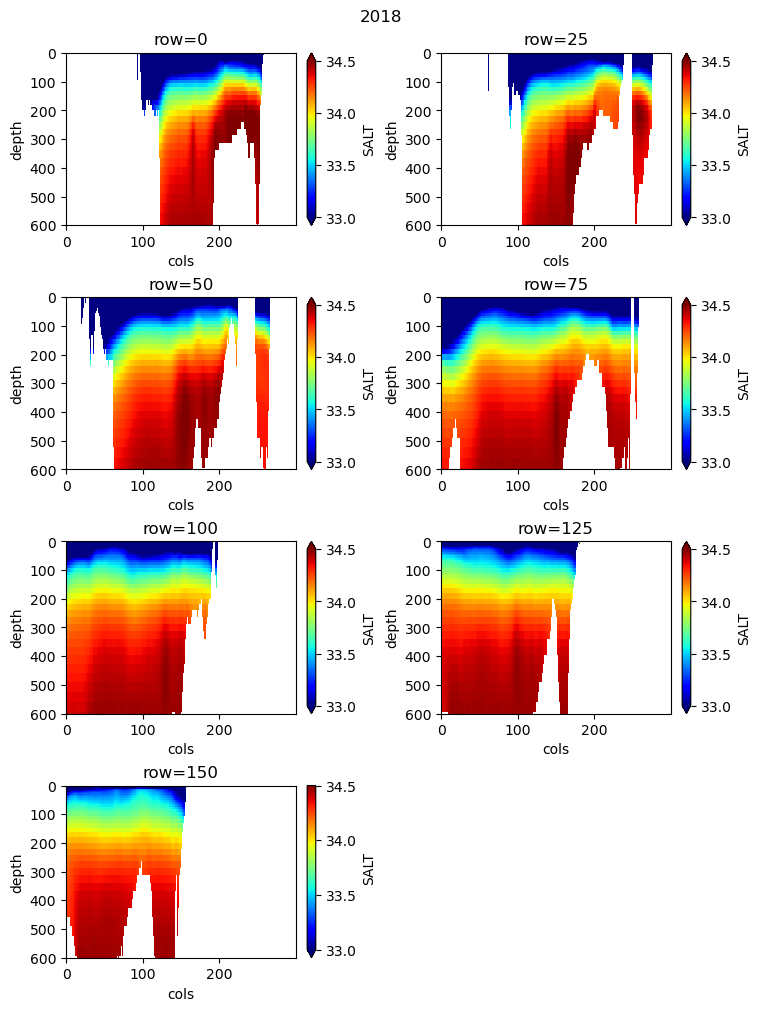

In [15]:
plt.rcParams['figure.figsize'] = [7.5, 10]
plt.rcParams['font.size'] = '10'

for i in range(4):
    fig, axs = plt.subplots(4,2,constrained_layout=True)
    ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8 = axs.ravel()
    
    salt_row000_1Y.isel(time=i).SALT.plot(ax=ax1,vmin=33,vmax=34.5,cmap='jet')
    salt_row025_1Y.isel(time=i).SALT.plot(ax=ax2,vmin=33,vmax=34.5,cmap='jet')
    salt_row050_1Y.isel(time=i).SALT.plot(ax=ax3,vmin=33,vmax=34.5,cmap='jet')
    salt_row075_1Y.isel(time=i).SALT.plot(ax=ax4,vmin=33,vmax=34.5,cmap='jet')
    salt_row100_1Y.isel(time=i).SALT.plot(ax=ax5,vmin=33,vmax=34.5,cmap='jet')
    salt_row125_1Y.isel(time=i).SALT.plot(ax=ax6,vmin=33,vmax=34.5,cmap='jet')
    salt_row150_1Y.isel(time=i).SALT.plot(ax=ax7,vmin=33,vmax=34.5,cmap='jet')
    
    ax8.axis('off')
    
    labels=["row=0","row=25","row=50","row=75","row=100","row=125","row=150"]
    
    for ax,label in zip((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8),labels):
        ax.set_ylim(600,0)
        ax.set_title(label)
        
    plt.suptitle(str(salt_row000_1Y.isel(time=i).time.values)[0:4])
        
    plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [7.5, 10]
plt.rcParams['font.size'] = '10'
fig, axs = plt.subplots(4,2,constrained_layout=True)
ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8 = axs.ravel()

theta_row000_1Y.isel(time=0).THETA.plot(ax=ax1)
theta_row025_1Y.isel(time=0).THETA.plot(ax=ax2)
theta_row050_1Y.isel(time=0).THETA.plot(ax=ax3)
theta_row075_1Y.isel(time=0).THETA.plot(ax=ax4)
theta_row100_1Y.isel(time=0).THETA.plot(ax=ax5)
theta_row125_1Y.isel(time=0).THETA.plot(ax=ax6)
theta_row150_1Y.isel(time=0).THETA.plot(ax=ax7)

ax8.axis('off')

for ax in (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8):
    ax.set_ylim(2000,0)